In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
data=pd.read_excel(r"C:\Users\RAGHAVENDRA KUMAR\Downloads\survey.xls")
data

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [6]:
datac=data.copy()
datac

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [7]:
datac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         12 non-null     object
 1   Nationality  12 non-null     object
 2   Sex          12 non-null     object
 3   Age          12 non-null     int64 
 4   Handedness   12 non-null     object
dtypes: int64(1), object(4)
memory usage: 608.0+ bytes


In [8]:
#From the above dataset we can say that there are 12people belongs to four different  nationality.

In [10]:
datac["Nationality"].unique()

array(['USA', 'Bangadesh', 'India', 'China'], dtype=object)

In [12]:
datac["Sex"].unique()

array(['Female', 'Male'], dtype=object)

In [15]:
datac.isnull().sum()

Name           0
Nationality    0
Sex            0
Age            0
Handedness     0
dtype: int64

In [16]:
#In the above dataset there are no nullvalues.

In [19]:
datac["Nationality"].value_counts()

USA          4
India        3
China        3
Bangadesh    2
Name: Nationality, dtype: int64

In [20]:
datac["Sex"].value_counts()

Male      7
Female    5
Name: Sex, dtype: int64

In [21]:
datac["Name"].value_counts()

Kathy     1
Linda     1
Peter     1
John      1
Fatima    1
Kadir     1
Dhaval    1
Sudhir    1
Parvir    1
Yan       1
Juan      1
Liang     1
Name: Name, dtype: int64

In [22]:
datac.describe()

,Age
count,12.000000
mean,32.833333
std,12.861736
min,18.000000
25%,22.750000
50%,31.000000
75%,38.500000
max,58.000000


#from the above dataset using describe function we can get the aggregations like mean,count,std,mim,max and percentiles of survey dataset.

In [26]:
datac["Age"].count()

12

In [27]:
datac["Age"].mean()

32.833333333333336

In [28]:
datac["Age"].std()

12.861735591444976

In [29]:
datac["Age"].min()

18

In [30]:
datac["Age"].max()

58

In [35]:
x1=np.percentile(datac["Age"],[25,50,75])
x1

array([22.75, 31.  , 38.5 ])

# Outliers:
outliers may impact our data.To find the outliers we can use method of IQR

In [36]:
q1=x1[0]
q2=x1[1]
q3=x1[2]

In [44]:
iqr=q3-q1
iqr

15.75

In [48]:
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)

In [49]:
lb

-0.875

In [50]:
ub

62.125

In [51]:
datac.loc[datac["Age"]<lb] 

,Name,Nationality,Sex,Age,Handedness


In [52]:
datac.loc[datac["Age"]>ub] 

,Name,Nationality,Sex,Age,Handedness


In [ ]:
#In the above dataset there are no outliers.

# Problem Statement:
Seperate Nationality based on Gender using Survey Dataset.

In [24]:
datac

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [54]:
pd.crosstab(datac.Nationality,datac.Sex,margins=True)

Sex,Female,Male,All
Nationality,,,
Bangadesh,1,1,2
China,2,1,3
India,0,3,3
USA,2,2,4
All,5,7,12


In [55]:
# From the above analysis we can say that
#1.One female and one male belongs to Bangladesh and the total count is two.
#2.Two females and one male belongs to China and the total count is three.
#3.Only Three males belongs to India and the total count is Three.
#4.Two females and Two males belongs to USA and the total count is four.

In [57]:
datac

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [59]:
datac.pivot_table(index="Nationality",columns="Sex")

Age           
Sex         Female       Male
Nationality                  
Bangadesh     31.0  25.000000
China         55.0  43.000000
India          NaN  34.333333
USA           20.5  20.500000

In [60]:
#By using pivot_table we can say the exact value whereas in crosstab we can get the count of it.
#1.In Bangladesh the age of female is 31 and male is 25
#2.In china the age of female is 55 and male is 43
#3.In India the age of male is 34.33 because in india there are 3 males so,it is giving the average value i.e,(mean).
#4.In USA there the average age of females is 20.5 and average age of male is 20.50000.

In [61]:
datac

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


# Problem statement:
Seperate Nationality based on Age.

# Violinplot:
Here we are using violin plot because we are  plotting categorical vs numerical.
    

<AxesSubplot:xlabel='Nationality', ylabel='Age'>

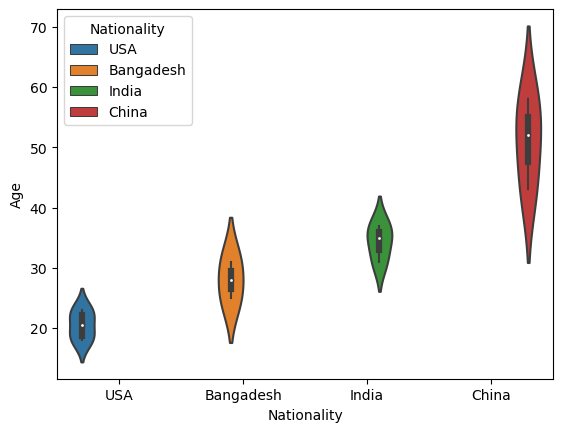

In [68]:
sn.violinplot(data=datac,x="Nationality",y="Age",hue="Nationality",size=100)

In [ ]:
#From the above analysis we cannot seperate the Nationality depending on ages because
#1.50% of ages in Bangladesh are overlapping(combining) with USA
#2.more than 75% ages of India are combining with Bangadesh.
#3.less than 25% ages of China are combing with India.

# Problem Statement:
Seperate Gender based on Age.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

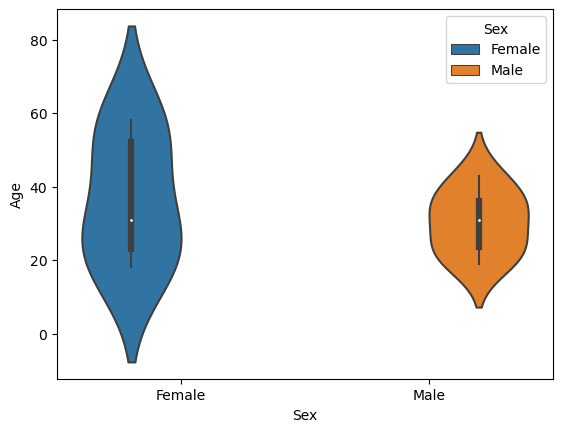

In [80]:
sn.violinplot(data=datac,x="Sex",y="Age",hue="Sex")

In [ ]:
#From the above plot we can say that
#.we cannot sepearte the females and males based on ages becauese 75% ages of male are overlapping with females.

# Problem Statement:
Seperate Names based on Age.

<AxesSubplot:xlabel='Name', ylabel='Age'>

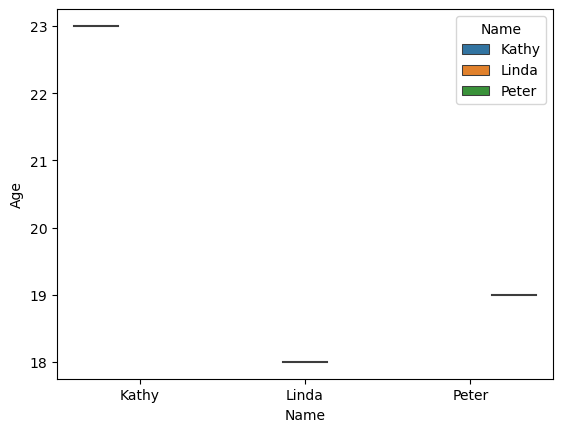

In [79]:
sn.violinplot(data=datac.head(3),x="Name",y="Age",hue="Name",size=100)

In [ ]:
#By using violinplot we can sepearte the names based on there ages.

# Boxplot:

<AxesSubplot:xlabel='Age'>

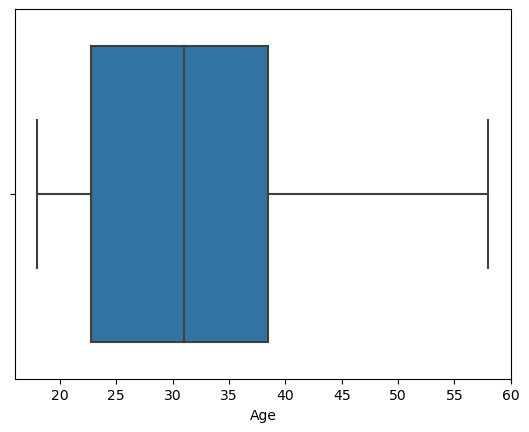

In [90]:
sn.boxplot(datac["Age"])

In [ ]:
#from boxplot we can say that there are no outliers and q2=31,q2=38.5 and q0=22.5.

<AxesSubplot:>

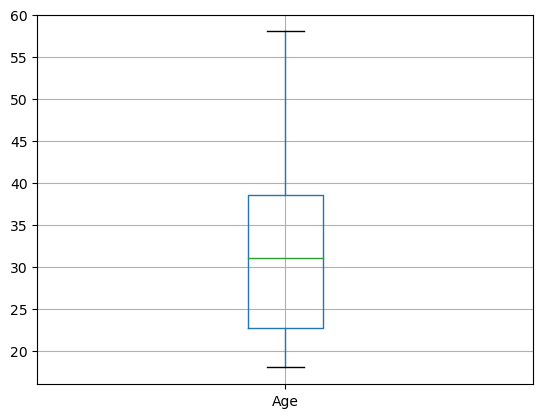

In [93]:
datac.boxplot()

In [ ]:
#By this barplot we can get exact and more accurate view of quartiles and outliers.

In [94]:
datac

,Name,Nationality,Sex,Age,Handedness
0,Kathy,USA,Female,23,Right
1,Linda,USA,Female,18,Right
2,Peter,USA,Male,19,Right
3,John,USA,Male,22,Left
4,Fatima,Bangadesh,Female,31,Left
5,Kadir,Bangadesh,Male,25,Left
6,Dhaval,India,Male,35,Left
7,Sudhir,India,Male,31,Left
8,Parvir,India,Male,37,Right
9,Yan,China,Female,52,Right


In [108]:
datac["Height"]=[123.5,176.4,153.1,167.6,143.8,156.9,145.8,174.76,156.9,171.0,145.9,167.9]
datac["weight"]=[34,56,67,89,35,69,90,27,66,87,46,76]

In [109]:
datac

,Name,Nationality,Sex,Age,Handedness,Height,weight
0,Kathy,USA,Female,23,Right,123.50,34
1,Linda,USA,Female,18,Right,176.40,56
2,Peter,USA,Male,19,Right,153.10,67
3,John,USA,Male,22,Left,167.60,89
4,Fatima,Bangadesh,Female,31,Left,143.80,35
5,Kadir,Bangadesh,Male,25,Left,156.90,69
6,Dhaval,India,Male,35,Left,145.80,90
7,Sudhir,India,Male,31,Left,174.76,27
8,Parvir,India,Male,37,Right,156.90,66
9,Yan,China,Female,52,Right,171.00,87


<AxesSubplot:>

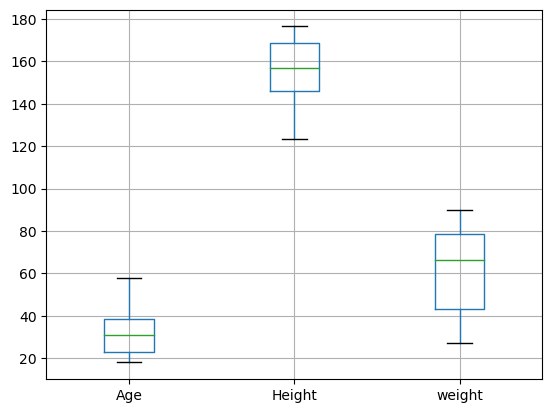

In [110]:
datac.boxplot()

# Scatterplot:

# 1.Age vs Height

<AxesSubplot:xlabel='Age', ylabel='Height'>

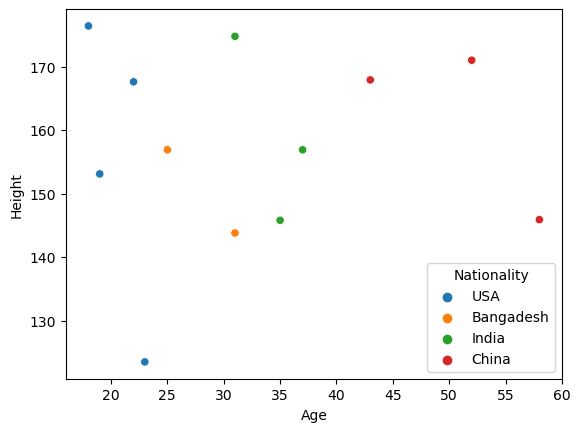

In [106]:
sn.scatterplot(data=datac,x="Age",y="Height",hue="Nationality")

# 2.Age vs Weight

<AxesSubplot:xlabel='Age', ylabel='weight'>

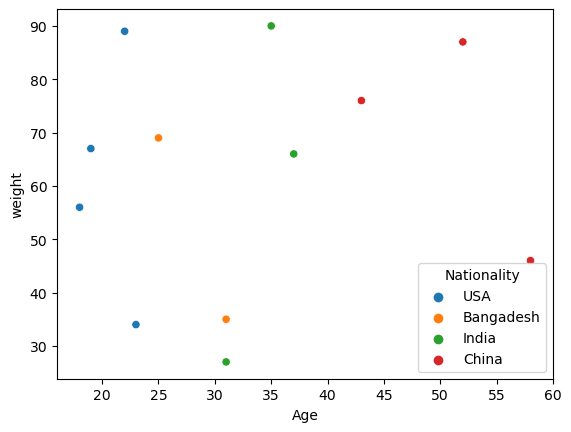

In [112]:
sn.scatterplot(data=datac,x="Age",y="weight",hue="Nationality")

# 3.Height vs Weight

<AxesSubplot:xlabel='Height', ylabel='weight'>

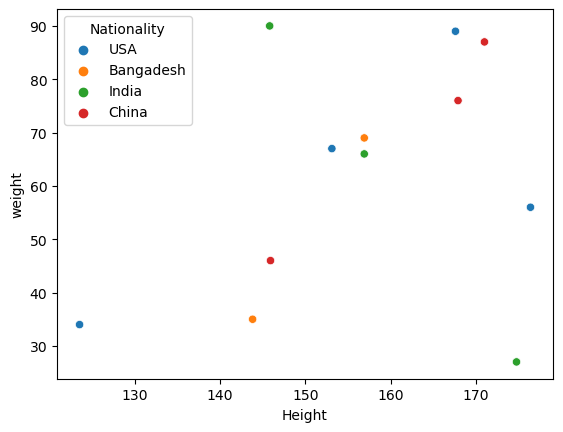

In [113]:
sn.scatterplot(data=datac,x="Height",y="weight",hue="Nationality")

In [ ]:
#From the above three(3) combinations Age vs Height is best combination to seperate the Nationality.
#because we can separate china and india but some values of bangladesh and USA are overlapping.

# Based on Gender(Sex)

# 1.Age vs Height.

<AxesSubplot:xlabel='Age', ylabel='Height'>

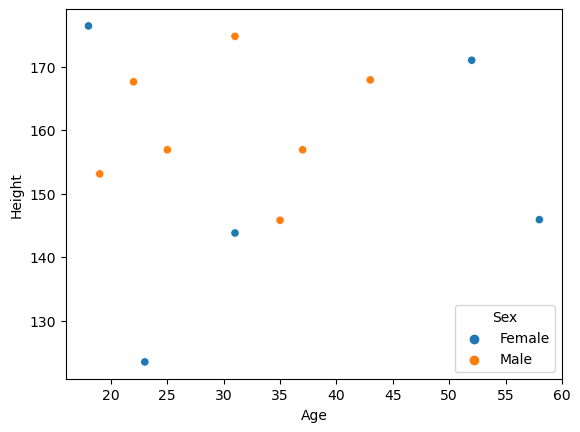

In [107]:
sn.scatterplot(data=datac,x="Age",y="Height",hue="Sex")

# 2.Age vs Weight.

<AxesSubplot:xlabel='Age', ylabel='weight'>

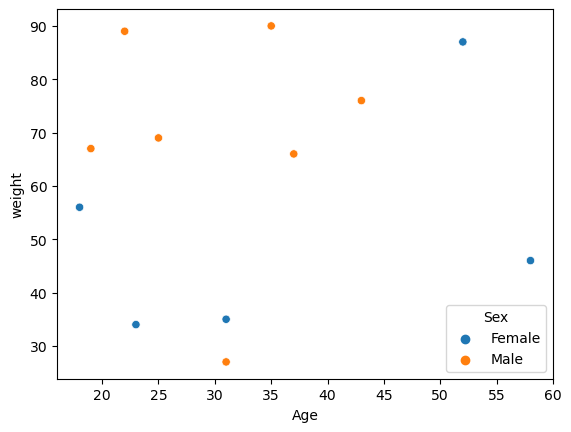

In [115]:
sn.scatterplot(data=datac,x="Age",y="weight",hue="Sex")

# 3.Height vs Weight.

<AxesSubplot:xlabel='weight', ylabel='Height'>

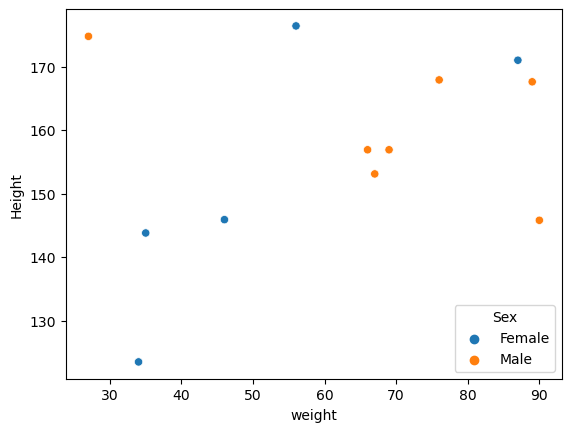

In [116]:
sn.scatterplot(data=datac,x="weight",y="Height",hue="Sex")

In [ ]:
#From the above three(3) combinations 2.Age vs Weight  is best combination to seperate the Gender.
#because if we imagine a line at 60 there will be chance pf less error compared to other combinations.

# Bargraph:

In [120]:
datac["Nationality"].value_counts()

USA          4
India        3
China        3
Bangadesh    2
Name: Nationality, dtype: int64

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

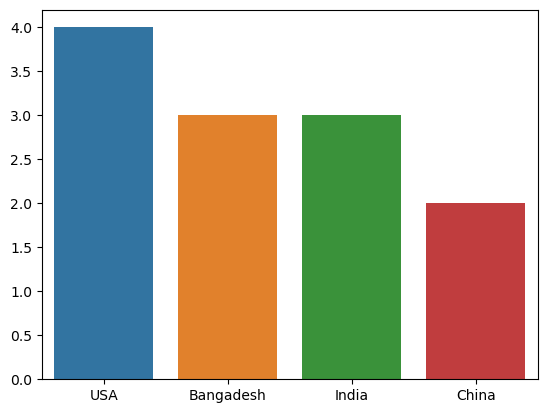

In [126]:
sn.barplot(datac["Nationality"].unique(),[4,3,3,2])

In [ ]:
#From the above plot we can say that there are 4USA citizens ,3 Bang,3 IND and 2 china.

Text(0, 0.5, 'Count')

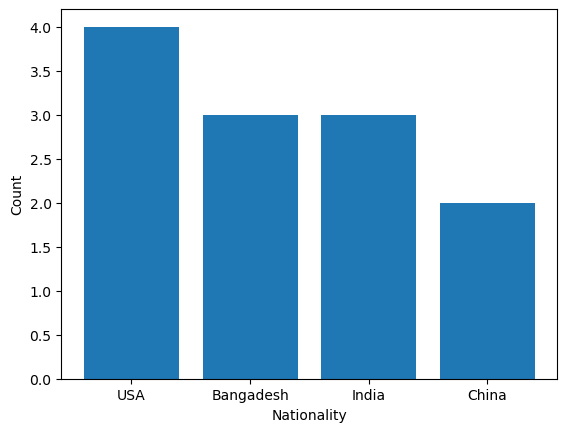

In [133]:
plt.bar(datac["Nationality"].unique(),[4,3,3,2])
plt.xlabel("Nationality")
plt.ylabel("Count")

# distplot:

# distplot is a univariate plot and it plots the distribution plot 
where higher density value indicates the less standard deviation.

In [138]:
USA=datac.loc[datac["Nationality"]=="USA"]
Bang=datac.loc[datac["Nationality"]=="Bangadesh"]
India=datac.loc[datac["Nationality"]=="India"]
China=datac.loc[datac["Nationality"]=="China"]

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar fle

<AxesSubplot:xlabel='Age', ylabel='Density'>

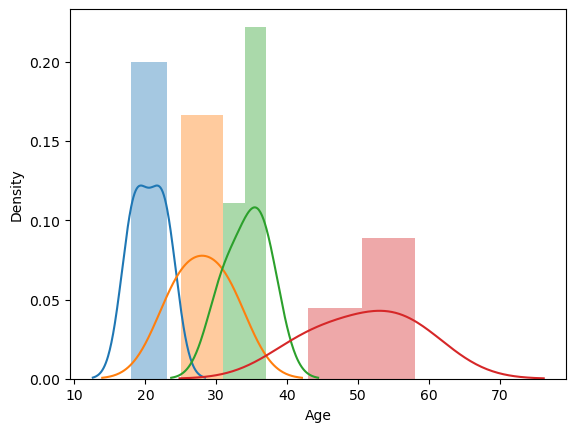

In [139]:
sn.distplot(USA["Age"])
sn.distplot(Bang["Age"])
sn.distplot(India["Age"])
sn.distplot(China["Age"])

In [142]:
datac.loc[datac["Nationality"]=="China"].describe()

,Age,Height,weight
count,3.000000,3.000000,3.000000
mean,51.000000,161.600000,69.666667
std,7.549834,13.684663,21.221059
min,43.000000,145.900000,46.000000
25%,47.500000,156.900000,61.000000
50%,52.000000,167.900000,76.000000
75%,55.000000,169.450000,81.500000
max,58.000000,171.000000,87.000000


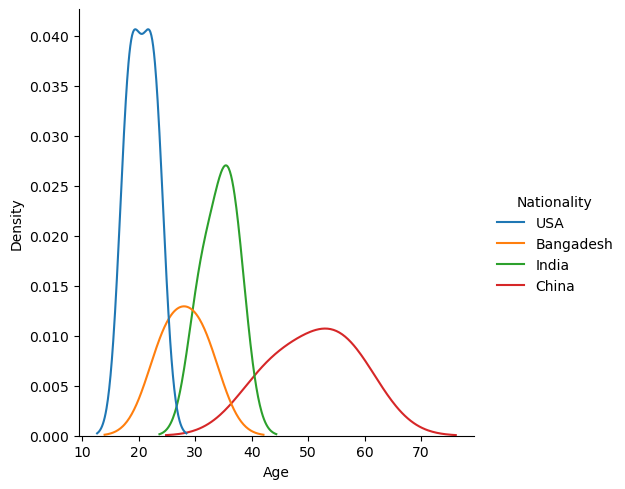

In [144]:
sn.displot(data=datac,x="Age",hue="Nationality",kind="kde")

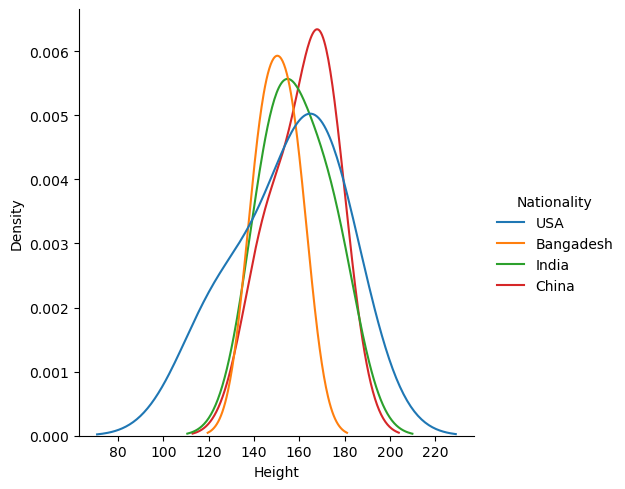

In [145]:
sn.displot(data=datac,x="Height",hue="Nationality",kind="kde")

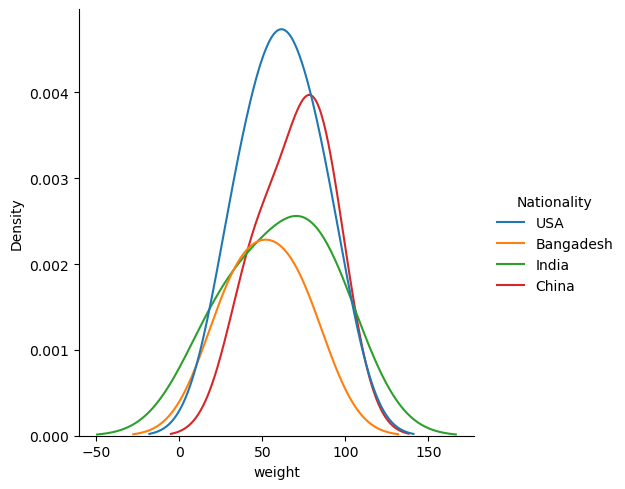

In [147]:
sn.displot(data=datac,x="weight",hue="Nationality",kind="kde")

In [ ]:
#we can seperate the nationality based on ages by using displot with less chance of error compared with other two parameters.

# Based on Gender(Sex).

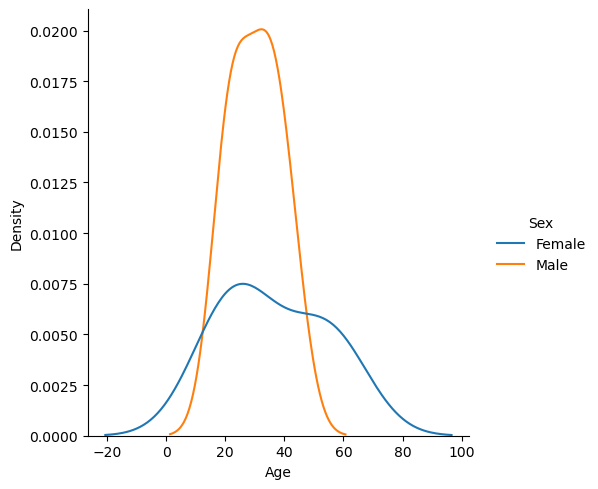

In [148]:
sn.displot(data=datac,x="Age",hue="Sex",kind="kde")

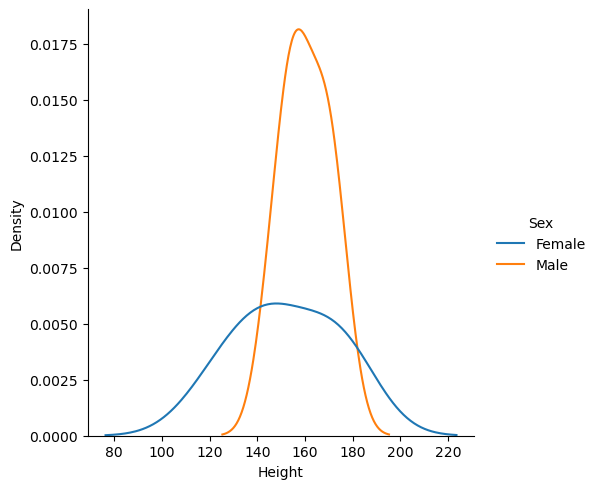

In [149]:
sn.displot(data=datac,x="Height",hue="Sex",kind="kde")

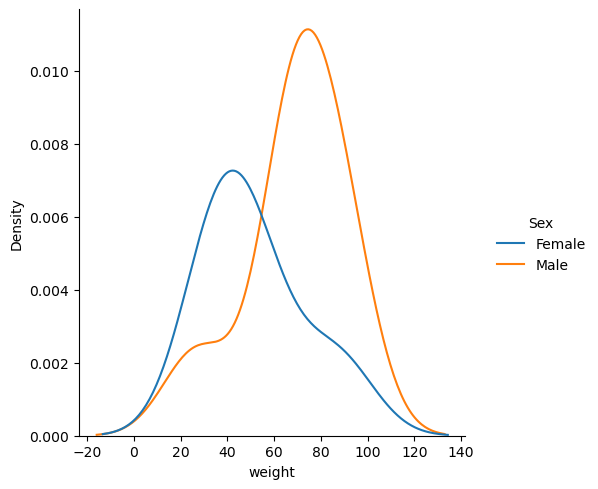

In [150]:
sn.displot(data=datac,x="weight",hue="Sex",kind="kde")

In [151]:
#Based on Weight there is more chance to sepearte the gender compared to Height and Age.

# countplot:

C:\Users\RAGHAVENDRA KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Nationality', ylabel='count'>

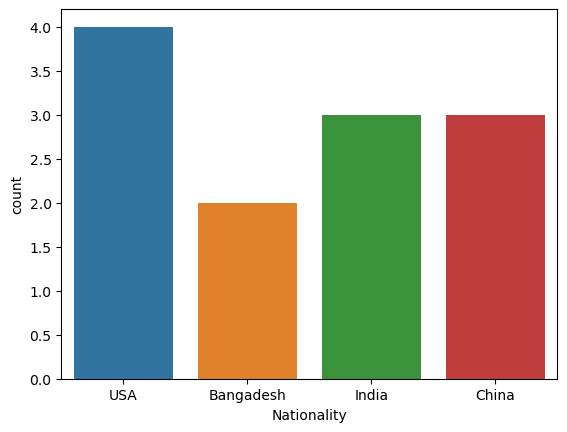

In [152]:
sn.countplot(datac["Nationality"],)

# regplot:

<AxesSubplot:xlabel='Age', ylabel='Height'>

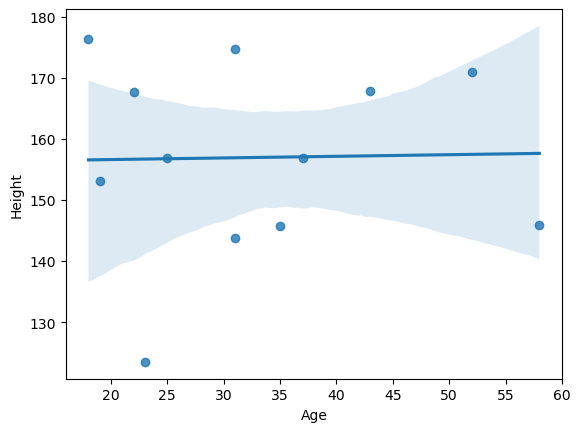

In [153]:
sn.regplot(data=datac,x="Age",y="Height")

<AxesSubplot:xlabel='Age', ylabel='weight'>

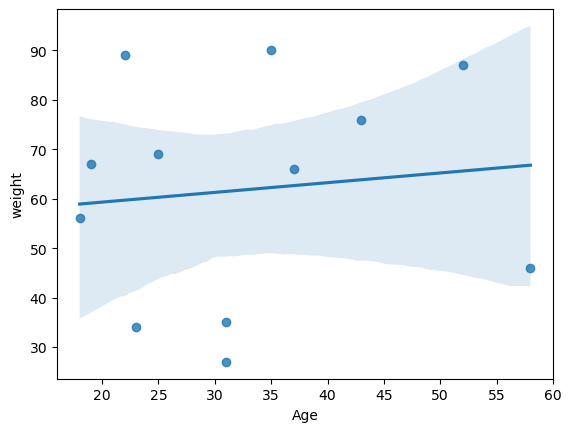

In [154]:
sn.regplot(data=datac,x="Age",y="weight")

<AxesSubplot:xlabel='weight', ylabel='Height'>

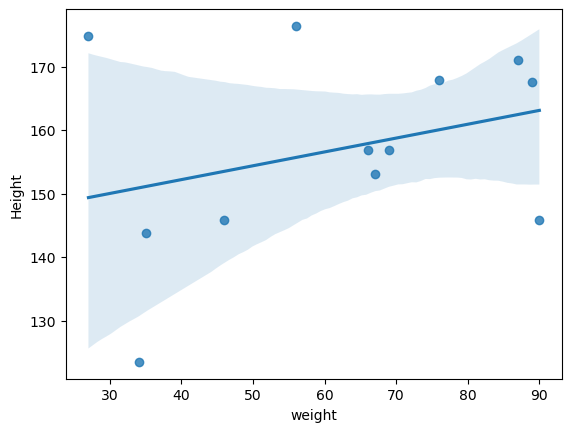

In [157]:
sn.regplot(data=datac,x="weight",y="Height")

# piechart:

In [159]:
datac["Nationality"].value_counts()

USA          4
India        3
China        3
Bangadesh    2
Name: Nationality, dtype: int64

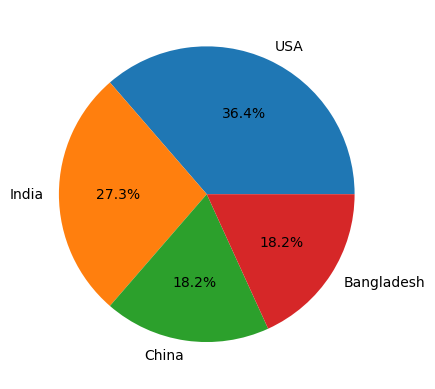

In [162]:
plt.pie([4,3,2,2],labels=["USA","India","China","Bangladesh"],autopct="%0.1f%%",radius=1)
plt.show()

In [169]:
datac["Sex"].value_counts()

Male      7
Female    5
Name: Sex, dtype: int64

([<matplotlib.patches.Wedge at 0x230046d67f0>,
 [Text(-0.28470088329267024, 1.062518426688391, 'Male'),
  Text(0.28470078381251407, -1.0625184533440069, 'Female')],
 [Text(-0.15529139088691102, 0.579555505466395, '58.3%'),
  Text(0.15529133662500766, -0.5795555200058218, '41.7%')])

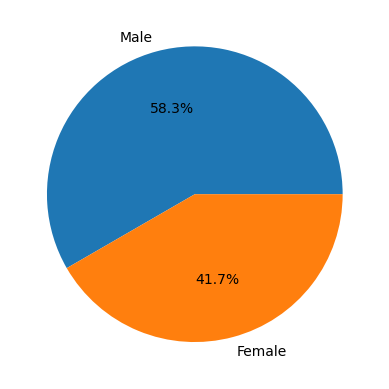

In [172]:
plt.pie([7,5],labels=["Male","Female"],autopct="%0.1f%%")

# Lineplot:
It is a bi-variate plot used to plot a line num vs num.

Text(0.5, 1.0, 'Age vs Height')

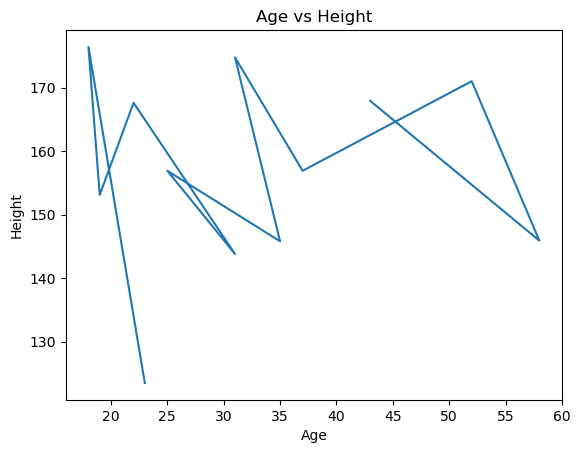

In [166]:
plt.plot(datac["Age"],datac["Height"])
plt.xlabel("Age")
plt.ylabel("Height")
plt.title("Age vs Height")

Text(0.5, 1.0, 'Age vs weight')

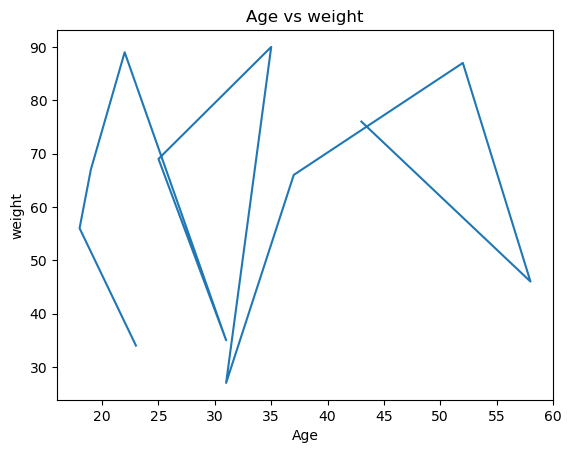

In [167]:
plt.plot(datac["Age"],datac["weight"])
plt.xlabel("Age")
plt.ylabel("weight")
plt.title("Age vs weight")

Text(0.5, 1.0, 'Height vs weight')

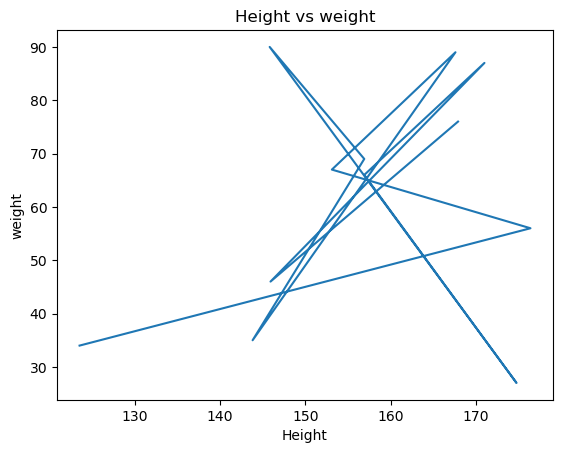

In [168]:
plt.plot(datac["Height"],datac["weight"])
plt.xlabel("Height")
plt.ylabel("weight")
plt.title("Height vs weight")

# Histogram:
    

<AxesSubplot:xlabel='Age', ylabel='Count'>

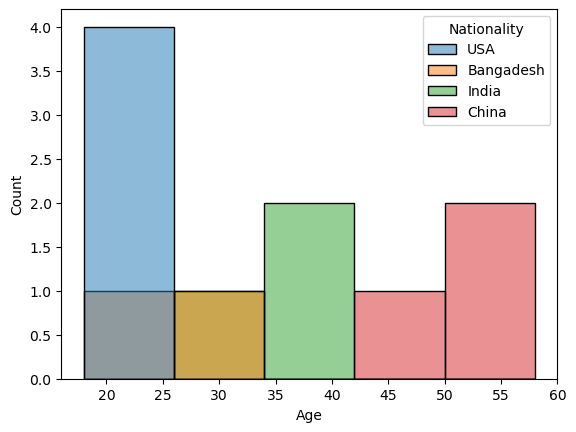

In [174]:
sn.histplot(data=datac,x=datac["Age"],hue="Nationality")

In [177]:
datac

,Name,Nationality,Sex,Age,Handedness,Height,weight
0,Kathy,USA,Female,23,Right,123.50,34
1,Linda,USA,Female,18,Right,176.40,56
2,Peter,USA,Male,19,Right,153.10,67
3,John,USA,Male,22,Left,167.60,89
4,Fatima,Bangadesh,Female,31,Left,143.80,35
5,Kadir,Bangadesh,Male,25,Left,156.90,69
6,Dhaval,India,Male,35,Left,145.80,90
7,Sudhir,India,Male,31,Left,174.76,27
8,Parvir,India,Male,37,Right,156.90,66
9,Yan,China,Female,52,Right,171.00,87


<AxesSubplot:xlabel='Age', ylabel='Count'>

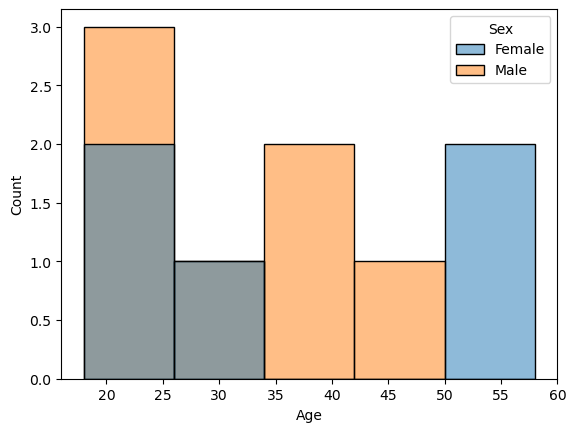

In [178]:
sn.histplot(data=datac,x=datac["Age"],hue="Sex")